In [1]:
import sys
import os
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Add the parent directory of "tests" to sys.path
sys.path.append(os.path.abspath("/Users/workspace/Software/Layered_Tank_Simulation/CherenkovSim/"))

In [2]:
from cherenkov_sim.particle import Particle
from cherenkov_sim.electron import Electron
from cherenkov_sim.material import Material

from astropy import units as u

In [3]:
ice = Material(
    name = 'Ice',
    Z_A = 0.55509 * u.mol / u.g,
    rho = 0.9180 * u.g / u.cm**3,
    I = 79.7 * u.eV, 
    n = 1.309,
    X0 = 39.31 * u.cm, 
    delta_file = '/Users/workspace/Software/PHYS-F-420/lesson2/delta_elec.txt'
)

water = Material(
    name = 'water',
    Z_A = 0.55509 * u.mol / u.g,
    rho = 1 * u.g / u.cm**3,
    I = 79.7 * u.eV,
    n = 1.333,
    X0 = 36.08 * u.cm, 
    delta_file = '/Users/workspace/Software/PHYS-F-420/lesson2/delta_elec.txt'
)



In [10]:
e_range = np.logspace(0,3,30) # Energy range from MeV to GeV

dedx_ion_array = []
dedx_rad_array = []
dedx_tot_array = []

for e in e_range:
    e_elec = e * u.MeV 
    elec = Electron(e_elec)
    elec.load_delta_parameter(water)
    dedx_ion = elec.dedx_ion(water)
    dedx_rad = elec.dedx_rad(water)
    dedx_tot = elec.dedx_tot(water)

    dedx_ion_array.append(dedx_ion.value)
    dedx_rad_array.append(dedx_rad.value)
    dedx_tot_array.append(dedx_tot.value)




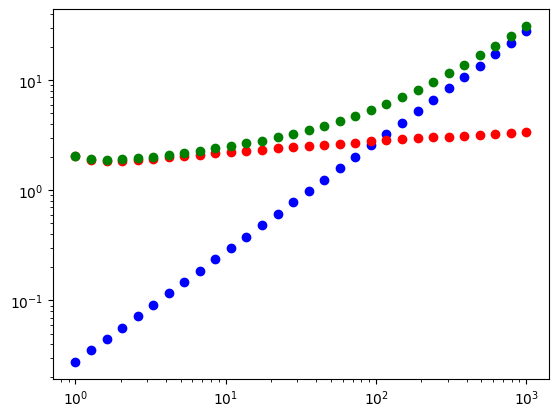

In [12]:
plt.scatter(e_range, dedx_rad_array, c='blue')
plt.scatter(e_range, dedx_ion_array, c='red')
plt.scatter(e_range, dedx_tot_array, c='green')

plt.xscale('log')
plt.yscale('log')

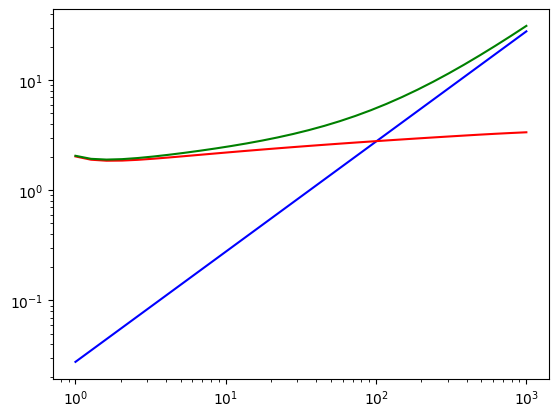

In [13]:
plt.plot(e_range, dedx_rad_array, c='blue')
plt.plot(e_range, dedx_ion_array, c='red')
plt.plot(e_range, dedx_tot_array, c='green')

plt.xscale('log')
plt.yscale('log')